Import knihoven



In [65]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import custom model   
! your custom model needs to be trainded at the same version of ultralitics as you running


In [66]:
#model = YOLO('yolov8n.pt')  # load an official model sometimes needs to be loaded original model and then custom one 
model = YOLO('best.pt')  # load a custom model 

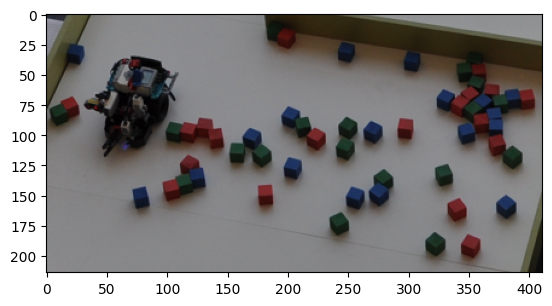

In [67]:
img = cv2.imread('obr12.png')#load of picture it's in BGR format 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show picture in RGB format 

In [68]:
img_height,img_width,img_channels = img.shape
print('width',img_width,'Px')
print('height',img_height,'Px')
print('channels',img_channels)

width 411 Px
height 214 Px
channels 3


In [69]:

results = model(img)#applies model on image 
objects_ids = []#list pro uchovavani id nalezenych objektu 
objects_centers=[]#list pro uchovavani souradnic stredu nalezenych objektu
cube_distances = []
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#zjisti classu objektu
            print(cls) #vypise classu objektu jako id
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px
            if cls ==0:
                cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),1)#nakresli box okolo detekovane veci 
            if cls ==1:
                cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),1)#nakresli box okolo detekovane veci 
            if cls ==2:
                cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),1)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),2, (255,0,255), thickness=-1)
            #nalezeni nejblizsi kostky 
            konstanta1 = abs((img_width/2)-center_x)
            print(konstanta1) 
            cube_distance = ((konstanta1*konstanta1 + img_height-center_y*img_height-center_y))*0.5
            cube_distances.append(cube_distance)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu 
            #cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_centers.append(center)#zapisovani hodnot do listu


0: 352x640 18 bluecubes, 22 green cubes, 20 red cubes, 319.3ms
Speed: 3.2ms preprocess, 319.3ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


2
X= 215 Y= 94 W= 232 H= 112
center: 223 103
17.5
confidence: 94
0
X= 372 Y= 149 W= 391 H= 169
center: 381 159
175.5
confidence: 93
1
X= 313 Y= 180 W= 332 H= 201
center: 322 190
116.5
confidence: 93
2
X= 332 Y= 151 W= 349 H= 172
center: 340 161
134.5
confidence: 92
2
X= 343 Y= 181 W= 360 H= 202
center: 351 191
145.5
confidence: 92
1
X= 377 Y= 109 W= 395 H= 128
center: 386 118
180.5
confidence: 91
2
X= 290 Y= 85 W= 305 H= 104
center: 297 94
91.5
confidence: 91
1
X= 170 Y= 107 W= 187 H= 127
center: 178 117
27.5
confidence: 91
1
X= 242 Y= 85 W= 259 H= 104
center: 250 94
44.5
confidence: 90
1
X= 234 Y= 163 W= 252 H= 183
center: 243 173
37.5
confidence: 90
1
X= 321 Y= 123 W= 337 H= 143
center: 329 133
123.5
confidence: 90
0
X= 263 Y= 88 W= 279 H= 108
center: 271 98
65.5
confidence: 90
0
X= 162 Y= 94 W= 179 H= 112
center: 170 103
35.5
confidence: 90
0
X= 340 Y= 89 W= 356 H= 108
center: 348 98
142.5
confidence: 88
0
X= 248 Y= 142 W= 263 H= 163
center: 255 152
49.5
confidence: 87
2
X= 124 Y= 8

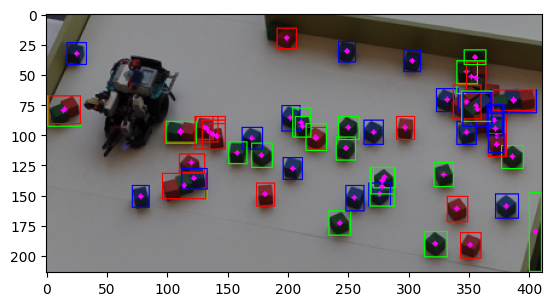

In [70]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show picture in RGB format 

[-10812.375, -1585.375, -13531.875, -8155.375, -9840.375, 3712.125, -5811.875, -12092.375, -9007.875, -17787.375, -6564.375, -8282.875, -10335.375, -274.875, -15007.875, -7477.375, -11630.375, -15610.375, -7997.375, -13651.875, 2525.125, -10922.375, -11127.375, -9131.875, -7222.875, 9843.125, -2279.375, 9759.625, 667.625, 475.625, -5855.375, 12849.625, -5962.875, -8364.875, 5248.125, -7942.875, -9460.375, -13425.375, 8838.125, -8670.375, -12099.875, -9869.375, -2021.875, -10971.875, -9552.875, 5100.125, 3277.625, 2412.625, -10704.875, -12637.375, 8945.625, 3755.625, 4342.125, 657.125, 5734.625, -10971.875, 3262.125, -11026.875, 3090.625, 7412.125]
9
243 173


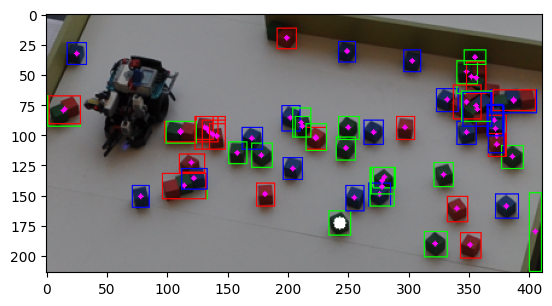

In [72]:
a = cube_distances.index(min(cube_distances))
print(cube_distances)
print(a)
x,y=objects_centers[a]# v listu object centers hleda pro dany index hodnoty
print(x,y)
cv2.circle(img, (x,y),5, (255,255,255), thickness=-1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show picture in RGB format 
